# #11. Data analysis

1. [Pandas](#Pandas)
    1. [Series](#Series)
        1. [Indexing](#Indexing)
    2. [Dataframe](#Dataframe)
        1. [Index alignment](#Index-alignment)
        2. [Indexing](#Indexing)
        3. [Operations](#Operations)
        4. [Missing Data](#Missing-Data)
        6. [Concat](#Concat)
        7. [Merge](#Merge)
        8. [Aggregation](#Aggregation)
2. [Machine learning in production](#Machine-learning-in-production)

## Pandas

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

#### Series

A Series is a one-dimensional array-like object containing an array of data (of any NumPy data type) and an associated array of data labels, called its *index*.

In [53]:
s = Series([4, 7, -5, 3])
print(s)
print(s.index) # Index objects are immutable
print(s.values)

0    4
1    7
2   -5
3    3
dtype: int64
RangeIndex(start=0, stop=4, step=1)
[ 4  7 -5  3]


In [59]:
# custom index
s = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(s)
print(s.index)

d    4
b    7
a   -5
c    3
dtype: int64
Index([u'd', u'b', u'a', u'c'], dtype='object')


In [60]:
# indexing
print(s['b'])
print(s[['c', 'a']])
print(s['b':'c'])
print('a' in s)

7
c    3
a   -5
dtype: int64
b    7
a   -5
c    3
dtype: int64
True


In [63]:
print(s[(s > 0) & (s < 5)])
print(s * 2)
print(np.square(s))

d    4
c    3
dtype: int64
d     8
b    14
a   -10
c     6
dtype: int64
d    16
b    49
a    25
c     9
dtype: int64


In [30]:
# Series like fixed order dict
s = Series({"Moscow": 70, "Russia": 180, "Vladivostok": 2000},
            index=["Moscow", "Russia", "Vladivostok", "Piter"])
print(s)

Moscow           70.0
Russia          180.0
Vladivostok    2000.0
Piter             NaN
dtype: float64


In [33]:
gimlet = Series({"Lemon": 20, "Gin": 75, "Syrup": 10})
daikiri = Series({"Lemon": 30, "Rum": 60, "Syrup": 15})
gimlet + daikiri

Gin       NaN
Lemon    50.0
Rum       NaN
Syrup    25.0
dtype: float64

#### Indexing

In [4]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [65]:
# explicit index when indexing
data[1]

'a'

In [66]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes. These are not functional methods, but attributes that expose a particular slicing interface to the data in the Series.

`loc` attribute allows indexing and slicing that always references the explicit index

In [67]:
print(data.loc[1])
print(data.loc[1:3])

a
1    a
3    b
dtype: object


`iloc` attribute allows indexing and slicing that always references the implicit Python-style index

In [68]:
print(data.iloc[1])
print(data.iloc[1:3])

b
3    b
5    c
dtype: object


#### Index alignment

In [96]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

The resulting array contains the union of indices of the two input arrays

In [97]:
area.index | population.index

Index([u'Alaska', u'California', u'New York', u'Texas'], dtype='object')

Any item for which one or the other does not have an entry is marked with NaN, or "Not a Number," which is how Pandas marks missing data

In [98]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [99]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### Dataframe

A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). 

The DataFrame has both a row and column index; it can be thought of as a dict of Series (one for all sharing the same index)

In [37]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 
    'year': [2000, 2001, 2002, 2001, 2002], 
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
}
DataFrame(data)

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [39]:
df = DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five'])
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [57]:
print(df.values)
print(df["pop"]) # The column returned when indexing a DataFrame is a view on the underlying data, not a copy.
print(df.year)
print("Unknown" in df.columns, 2003 in df.index)


[[2000 'Ohio' 1.5 0]
 [2001 'Ohio' 1.7 1]
 [2002 'Ohio' 3.6 2]
 [2001 'Nevada' 2.4 3]
 [2002 'Nevada' 2.9 4]]
one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
Name: pop, dtype: float64
one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64
False False


In [50]:
df["debt"] = np.arange(5)
df["temp"] = df.state == 'Ohio'
print(df)
del df["temp"]

       year   state  pop  debt   temp
one    2000    Ohio  1.5     0   True
two    2001    Ohio  1.7     1   True
three  2002    Ohio  3.6     2   True
four   2001  Nevada  2.4     3  False
five   2002  Nevada  2.9     4  False


#### Indexing

In [81]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [82]:
# attribute-style column access will not work in all cases
print(data.area is data['area'])
print(data.pop is data['pop'])

True
False


In [83]:
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [87]:
print(data.values)
print()
print(data.values[0])

[[  4.23967000e+05   3.83325210e+07   9.04139261e+01]
 [  1.70312000e+05   1.95528600e+07   1.14806121e+02]
 [  1.49995000e+05   1.28821350e+07   8.58837628e+01]
 [  1.41297000e+05   1.96511270e+07   1.39076746e+02]
 [  6.95662000e+05   2.64481930e+07   3.80187404e+01]]

[  4.23967000e+05   3.83325210e+07   9.04139261e+01]


Using the `iloc` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the DataFrame index and column labels are maintained in the result

In [88]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


Using the `loc` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [89]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


The ix indexer allows a hybrid of these two approaches:

In [90]:
# DEPRECATED
data.ix[:3, :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [91]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [93]:
# Any of these indexing conventions may also be used to set or modify values
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### Operations

In [5]:
A = np.random.randint(10, size=(3, 4))
df = pd.DataFrame(A, columns=list('QRST'))
print(df)
df - df.iloc[0]

   Q  R  S  T
0  9  6  3  7
1  3  2  9  0
2  0  7  6  3


,Q,R,S,T
0,0,0,0,0
1,-6,-4,6,-7
2,-9,1,3,-4


In [6]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,3,0,-3,1
1,1,0,7,-2
2,-7,0,-1,-4


In [7]:
halfrow = df.iloc[0, ::2]
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-6.0,NaN,6.0,NaN
2,-9.0,NaN,3.0,NaN


This preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context

#### Missing Data

Pandas chose to use sentinels for missing data, and further chose to use two already existing Python null values: the special floating point NaN value, and the Python None object

In [9]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [12]:
print(data.isnull())
print()
print(data[data.notnull()])

0    False
1     True
2    False
3     True
dtype: bool

0        1
2    hello
dtype: object


In [13]:
data.dropna()

0        1
2    hello
dtype: object

In [2]:
df = pd.DataFrame([[1, None, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [3]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [4]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [5]:
df[3] = np.nan
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [7]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [6]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [8]:
df.fillna(42)

,0,1,2,3
0,1.0,42.0,2,42.0
1,2.0,3.0,5,42.0
2,42.0,4.0,6,42.0


In [9]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


#### Concat

In [43]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [51]:
df1 = pd.DataFrame({"A": ["A1", "A2"], "B": ["B1", "B2"]}, [1, 2])
df2 = pd.DataFrame({"A": ["A3", "A4"], "B": ["B3", "B4"]}, [3, 4])
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [65]:
df1 = pd.DataFrame({"A": ["A1", "A2"], "B": ["B1", "B2"]}, [1, 2])
df2 = pd.DataFrame({"A": ["A1", "A2"], "B": ["B1", "B2"]}, [1, 2])
pd.concat([df1, df2], axis='col')

,A,B,A,B
1,A1,B1,A1,B1
2,A2,B2,A2,B2


`pd.concat` is that Pandas concatenation preserves indices, even if the result will have duplicate indices

In [66]:
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
1,A1,B1
2,A2,B2


One can avoid it by using
* `verify_integrity=True`
* `ignore_index=True`
* adding multiindex with `keys=['x', 'y']`

In [67]:
df1.append(df2)

,A,B
1,A1,B1
2,A2,B2
1,A1,B1
2,A2,B2


Pandas does not modify the original object–instead it creates a new object with the combined data. It also is not a very efficient method, because it involves creation of a new index and data buffer. Thus, if you plan to do multiple append operations, it is generally better to build a list of DataFrames and pass them all at once to the concat() function

In [60]:
df1 = pd.DataFrame({"A": ["A1", "A2"], "B": ["B1", "B2"], "C": ["C1", "C2"]}, [1, 2,])
df2 = pd.DataFrame({"B": ["B3", "B4"], "C": ["C3", "C4"], "D": ["D3", "D4"]}, [3, 4])
pd.concat([df1, df2])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [62]:
pd.concat([df1, df2], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [63]:
pd.concat([df1, df2], join_axes=[df1.columns])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


#### Merge

In [8]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [9]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [10]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [69]:
# one-to-one
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [70]:
# many-to-one
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [71]:
# many-to-many
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [72]:
# ON condition
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [73]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
pd.merge(df1, df3, left_on="employee", right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [74]:
df4 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df5 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
pd.merge(df4, df5, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


#### Aggregation

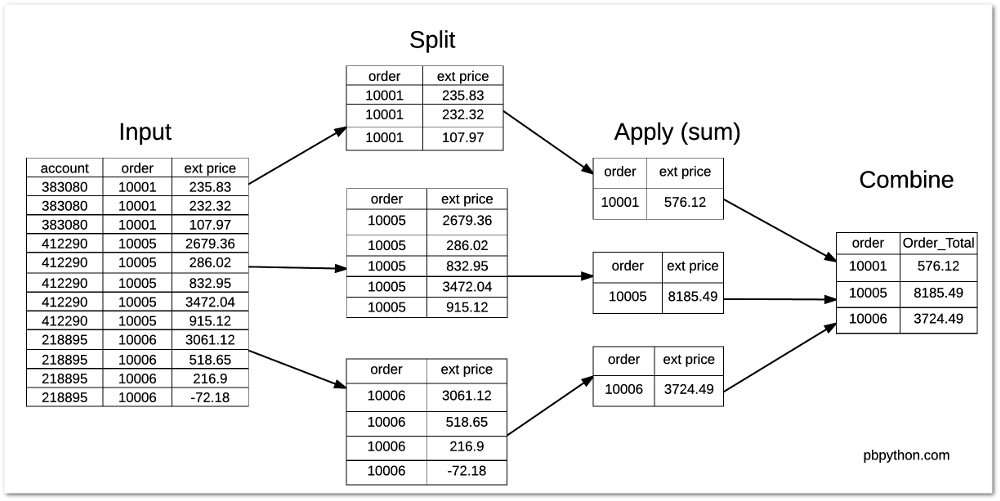

In [75]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [77]:
print(df.groupby('key'))
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [78]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [79]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [80]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [82]:
def filter_func(x):
    return x['data2'].std() > 4

df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


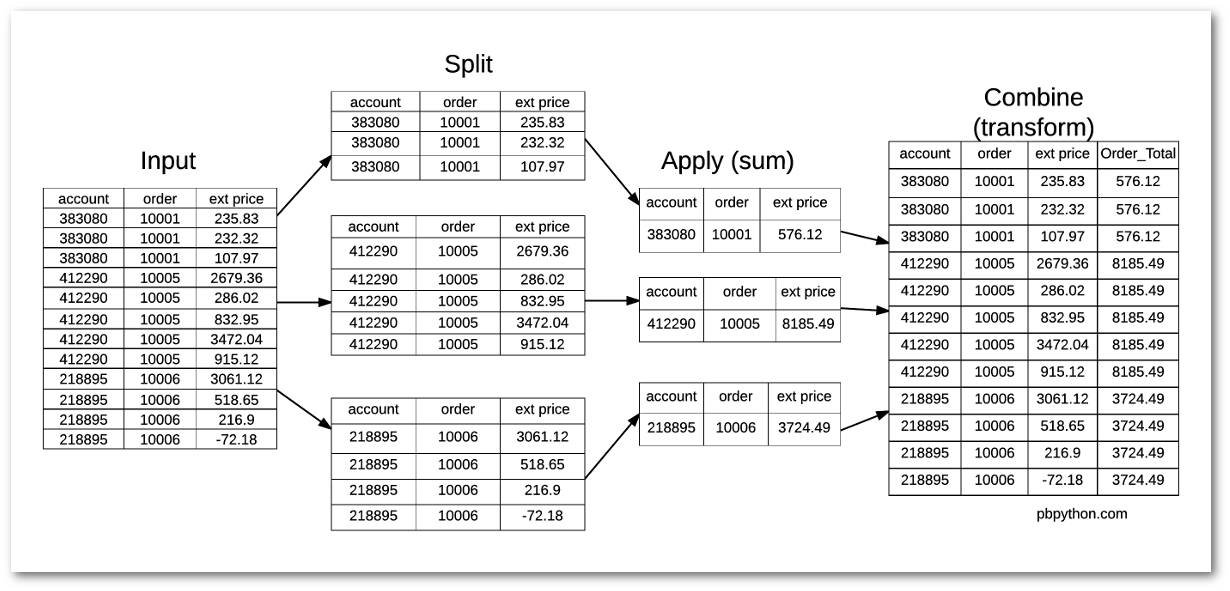

In [83]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [84]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


### References

* http://kanoki.org/2017/07/16/pandas-in-a-nutshell/
* https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
* https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793
* https://medium.com/towards-data-science/pandas-tips-and-tricks-33bcc8a40bb9
* http://pbpython.com/pandas_transform.html
* https://tomaugspurger.github.io/modern-1-intro
* https://www.dataquest.io/blog/pandas-big-data/
* http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/
* http://ramiro.org/notebook/top-incomes-share/
* https://www.dataquest.io/blog/python-json-tutorial/
* https://jakevdp.github.io/blog/2015/10/17/analyzing-pronto-cycleshare-data-with-python-and-pandas/
* http://nbviewer.jupyter.org/github/lalelale/profiles_analysis/blob/master/profiles.ipynb#Analysis-and-visualization-of-a-public-OKCupid-profile-dataset-using-python-and-pandas
* https://gist.github.com/5agado/ee95008f25730d04bfd0eedd5c36f0ee#file-pandas-and-seaborn-ipynb
* https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/
* https://unsupervisedmethods.com/over-150-of-the-best-machine-learning-nlp-and-python-tutorials-ive-found-ffce2939bd78

### Summary

* pandas is very powerful for data analysis you just need to get used to it

## Machine learning in production

* At early stage start-ups: 
    * the primary analytic focus is to implement logging, to build ETL processes, to model data and design schemas so data can be tracked and stored. The goal here is focused on building the analytics foundation rather than analysis itself
* At mid-stage growing start-ups:
    * Since the company is growing, the data is probably growing too. The data platform needs to adapt, but with the foundation laid out already, there will be a natural shift to insight generation. Unless the company leverages Data Science for its strategic differentiation to start with, many analytics work are around defining KPI, attributing growth, and finding the next opportunities to grow
* Companies who achieved scale:
    * When the company scales up, data also scales up. It needs to leverage data to create or maintain competitive edge. e.g. Search results need to be better, recommendations need to be more relevant, logistics or operations need to be more efficient — this is the time where specialist like ML engineers, Optimization experts, Experimentation designers can play a huge role in stepping up the game.

Typical process of creating a data pipeline:
* need for a dataset that can be produced on a recurring basis
* designing the data schema of the output dataset
* coding
* code submit, code reviews
* testing, dry-running
* merge code into master, deploy
* monitoring, error reporting, and alerts

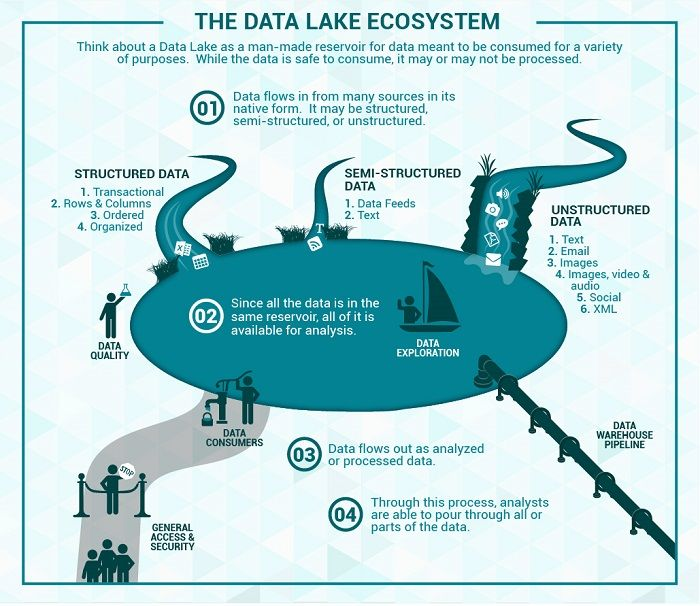

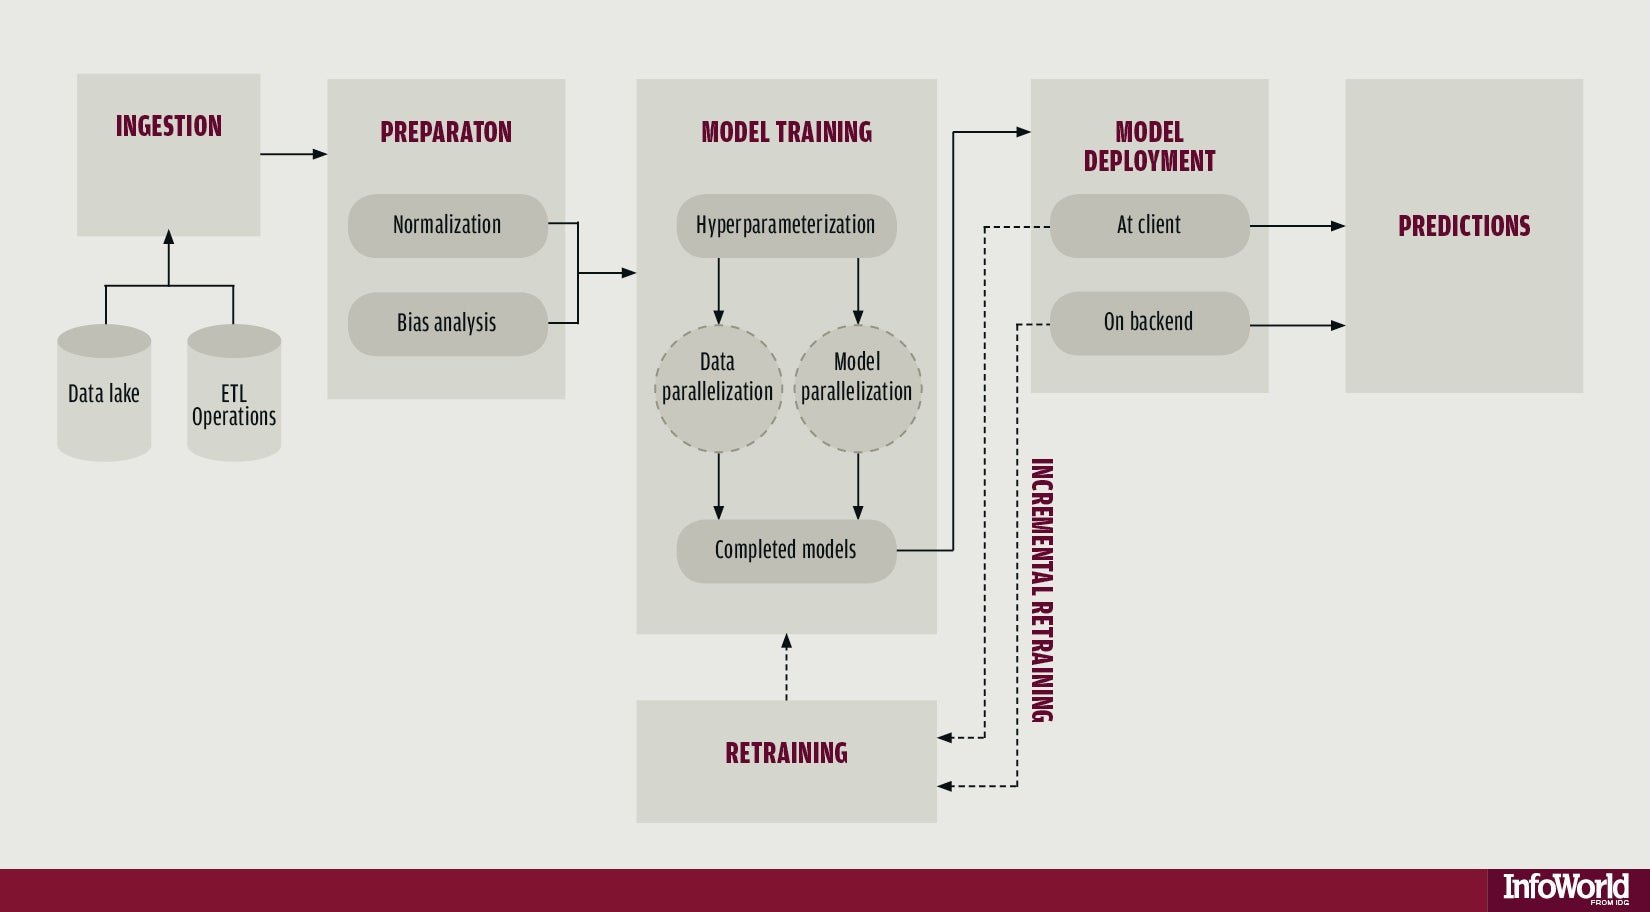

__Airbnb Scoring__

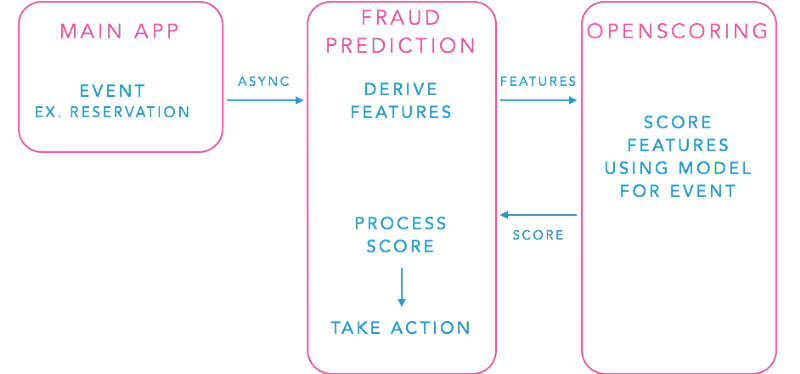

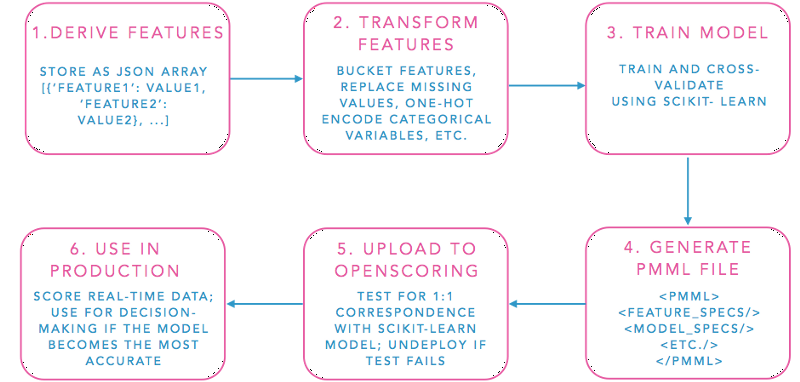

__Airbnb LTV modeling__

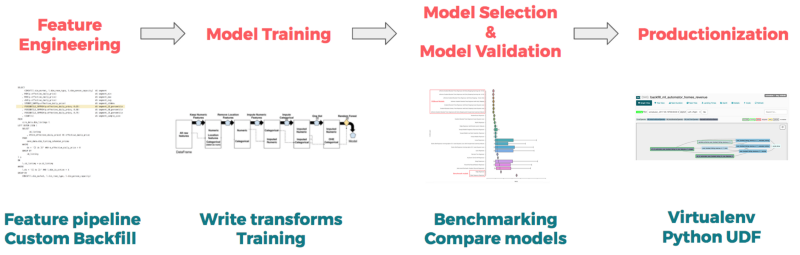

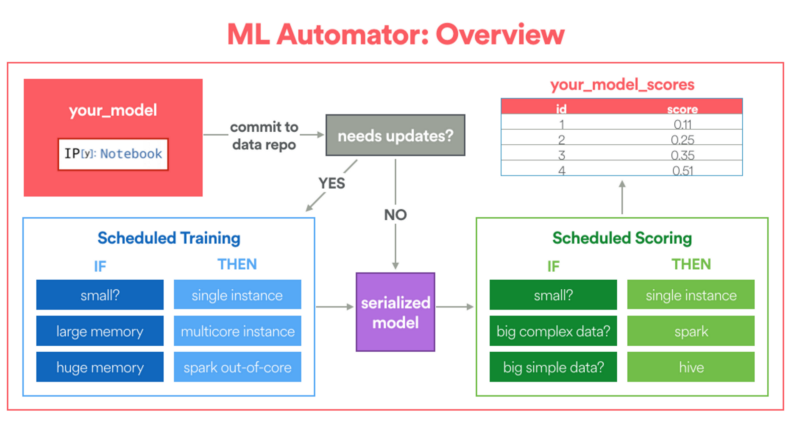

Lambda architecture
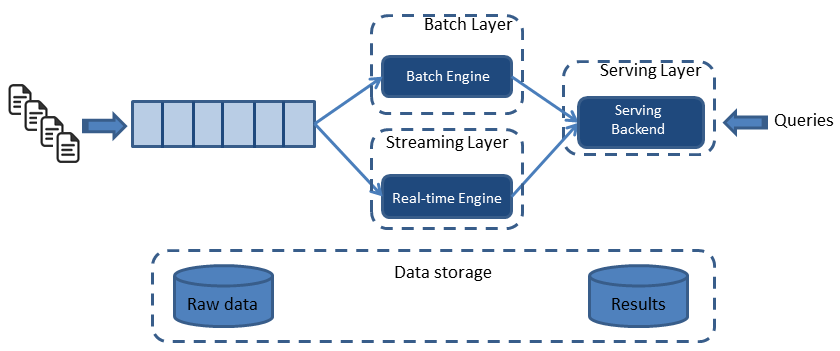

Kappa architecture
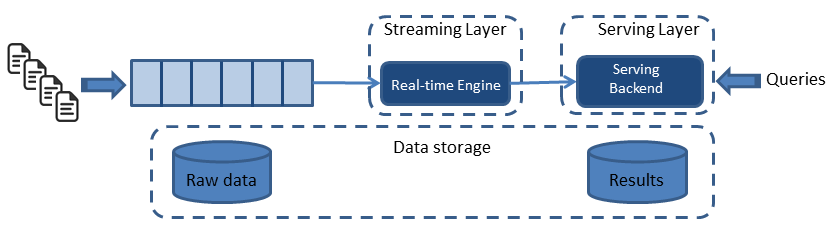

Major categories of technical debt:
* challenges in information hiding and encapsulation of change impact;
* lurking data dependencies that come back to bite;
* glue-code and configuration;
* and drift between the changing external world and the understanding of that world as it is captured in some model.

### References

* http://blog.kaggle.com/2012/10/04/engineering-practices-in-data-science/
* http://blog.kaggle.com/2016/07/21/approaching-almost-any-machine-learning-problem-abhishek-thakur/
* https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
* https://medium.com/@rchang/my-two-year-journey-as-a-data-scientist-at-twitter-f0c13298aee6
* https://medium.com/netflix-techblog/evolution-of-the-netflix-data-pipeline-da246ca36905
* https://blog.keen.io/architecture-of-giants-data-stacks-at-facebook-netflix-airbnb-and-pinterest-9b7cd881af54
* https://blog.insightdatascience.com/the-data-engineering-ecosystem-an-interactive-map-b682627c2534
* https://research.google.com/pubs/pub43146.html
* http://martin.zinkevich.org/rules_of_ml/rules_of_ml.pdf
* https://spectrum.ieee.org/computing/software/deconstructing-recommender-systems
* https://medium.com/airbnb-engineering/using-machine-learning-to-predict-value-of-homes-on-airbnb-9272d3d4739d
* https://www.oreilly.com/ideas/applying-the-kappa-architecture-in-the-telco-industry
* https://www.youtube.com/watch?v=vKU8MWORHP8&feature=youtu.be

### Summary

* creating successeful model is just part of the process
* hardest thing is to make whole process stable, maintainable and reproducable